<a href="https://colab.research.google.com/github/johncban/SANDBOX/blob/AI_AuditLock_v1/AuditLock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install required packages
!pip install tensorflow==2.15.0
!pip install tensorflow-lite==2.15.0
!pip install numpy pandas matplotlib seaborn
!pip install scikit-learn
!pip install datasets huggingface-hub
!pip install opencv-python pillow
!pip install requests beautifulsoup4
!pip install argon2-cffi
!pip install cryptography

ERROR: Could not find a version that satisfies the requirement tensorflow==2.15.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.15.0
ERROR: Could not find a version that satisfies the requirement tensorflow-lite==2.15.0 (from versions: none)
ERROR: No matching distribution found for tensorflow-lite==2.15.0


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import json
import os
import requests
from typing import Dict, List, Tuple, Any, Optional
import logging
import hashlib
import secrets
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

print("🚀 PassBook AI Testing Environment Setup Complete!")
print(f"TensorFlow Version: {tf.__version__}")
print(f"GPU Available: {len(tf.config.list_physical_devices('GPU'))} devices")
print(f"Physical Devices: {tf.config.list_physical_devices()}")

🚀 PassBook AI Testing Environment Setup Complete!
TensorFlow Version: 2.19.0
GPU Available: 1 devices
Physical Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
class PasswordSecurityAnalyzer:
    """Analyzes password security patterns for PassBook validation"""

    def __init__(self):
        self.common_passwords = [
            'password', '123456', 'password123', 'admin', 'root', 'qwerty',
            'letmein', 'welcome', 'monkey', 'dragon', 'master', 'shadow'
        ]

    def analyze_password(self, password: str) -> Dict[str, Any]:
        """Comprehensive password analysis"""
        return {
            'length': len(password),
            'has_uppercase': int(any(c.isupper() for c in password)),
            'has_lowercase': int(any(c.islower() for c in password)),
            'has_digits': int(any(c.isdigit() for c in password)),
            'has_special': int(any(not c.isalnum() for c in password)),
            'has_common_pattern': int(any(common in password.lower() for common in self.common_passwords)),
            'entropy_score': self._calculate_entropy(password),
            'character_diversity': len(set(password)) / len(password) if password else 0,
            'sequential_chars': self._count_sequential_chars(password),
            'repeated_chars': self._count_repeated_chars(password)
        }

    def _calculate_entropy(self, password: str) -> float:
        """Calculate password entropy"""
        if not password:
            return 0
        prob = [password.count(c) / len(password) for c in set(password)]
        return -sum(p * np.log2(p) for p in prob if p > 0)

    def _count_sequential_chars(self, password: str) -> int:
        """Count sequential character patterns"""
        sequential = 0
        for i in range(len(password) - 2):
            if ord(password[i+1]) == ord(password[i]) + 1 and ord(password[i+2]) == ord(password[i]) + 2:
                sequential += 1
        return sequential

    def _count_repeated_chars(self, password: str) -> int:
        """Count repeated character patterns"""
        repeated = 0
        for i in range(len(password) - 1):
            if password[i] == password[i+1]:
                repeated += 1
        return repeated

def generate_password_dataset(n_samples: int = 2000) -> pd.DataFrame:
    """Generate comprehensive password dataset"""
    analyzer = PasswordSecurityAnalyzer()

    # Generate diverse password samples
    weak_passwords = [
        'password', '123456', 'qwerty', 'admin', 'root', 'letmein',
        'password123', '12345678', 'welcome', 'monkey', 'dragon'
    ] * (n_samples // 6)

    medium_passwords = [
        'Password1', 'MyPass2023', 'SecureP4ss', 'Welcome123', 'Admin2024',
        'MySecretKey', 'PassWord99', 'HelloWorld1', 'Computer123'
    ] * (n_samples // 6)

    strong_passwords = [
        'X9$mK2*vL8#nQ1!', 'Tr@nsf0rm3r$2024', 'Z7&nM9^pL4@tR6!',
        'My$ecur3P@ssw0rd!', 'Cr7pt0Gr@ph1c$', '!Sup3r$tr0ng#2024',
        'Qu@ntum$3cur1ty!', 'B10m3tr1c@uth!', 'Enc7pt10n#K3y$'
    ] * (n_samples // 6)

    # Add random variations
    all_passwords = weak_passwords + medium_passwords + strong_passwords
    np.random.shuffle(all_passwords)

    # Ensure we have exactly n_samples
    all_passwords = all_passwords[:n_samples]

    data = []
    for password in all_passwords:
        features = analyzer.analyze_password(password)

        # Determine strength level (0=Weak, 1=Medium, 2=Strong)
        if features['length'] < 8 or features['has_common_pattern'] or features['entropy_score'] < 2.5:
            strength = 0  # Weak
        elif (features['length'] >= 8 and
              sum([features['has_uppercase'], features['has_lowercase'],
                   features['has_digits'], features['has_special']]) >= 3 and
              features['entropy_score'] >= 3.5):
            strength = 2  # Strong
        else:
            strength = 1  # Medium

        features['strength_level'] = strength
        features['password_hash'] = hashlib.sha256(password.encode()).hexdigest()[:8]
        data.append(features)

    return pd.DataFrame(data)

# Generate password dataset
password_df = generate_password_dataset(2000)
print(f"📊 Password Dataset Generated: {password_df.shape}")
print(f"Strength Distribution:\\n{password_df['strength_level'].value_counts()}")
print("\\nSample Features:")
print(password_df.head())

📊 Password Dataset Generated: (2000, 12)
Strength Distribution:\nstrength_level
0    1052
2     552
1     396
Name: count, dtype: int64
\nSample Features:
   length  has_uppercase  has_lowercase  has_digits  has_special  \
0       6              0              1           0            0   
1      15              1              1           1            1   
2      16              1              1           1            1   
3      11              1              1           1            0   
4       5              0              1           0            0   

   has_common_pattern  entropy_score  character_diversity  sequential_chars  \
0                   1       2.584963             1.000000                 0   
1                   0       3.906891             1.000000                 0   
2                   0       3.577820             0.812500                 0   
3                   0       2.845351             0.727273                 0   
4                   1       2.321928     

In [5]:
class AndroidUITestGenerator:
    """Generates Android UI testing scenarios for Jetpack Compose"""

    def __init__(self):
        self.screen_types = ['login', 'registration', 'vault', 'item_detail', 'settings', 'biometric_auth']
        self.interaction_types = [
            'button_click', 'text_input', 'scroll', 'swipe', 'long_press',
            'biometric_trigger', 'form_submit', 'navigation', 'search', 'selection'
        ]
        self.compose_elements = [
            'TextField', 'Button', 'LazyColumn', 'Card', 'Dialog',
            'BottomSheet', 'TopAppBar', 'FloatingActionButton', 'Switch', 'Slider'
        ]

    def generate_ui_scenarios(self, n_samples: int = 1500) -> pd.DataFrame:
        """Generate UI testing scenarios"""
        np.random.seed(42)

        data = []
        for _ in range(n_samples):
            screen = np.random.choice(self.screen_types)
            interaction = np.random.choice(self.interaction_types)
            element = np.random.choice(self.compose_elements)

            # Generate realistic features based on screen and interaction
            scenario = self._create_scenario(screen, interaction, element)
            data.append(scenario)

        return pd.DataFrame(data)

    def _create_scenario(self, screen: str, interaction: str, element: str) -> Dict:
        """Create realistic UI test scenario"""
        base_success_rate = 0.85

        # Screen-specific adjustments
        screen_multipliers = {
            'login': 0.95, 'registration': 0.90, 'vault': 0.92,
            'item_detail': 0.88, 'settings': 0.93, 'biometric_auth': 0.80
        }

        # Interaction complexity
        interaction_complexity = {
            'button_click': 1, 'text_input': 2, 'scroll': 1, 'swipe': 2,
            'long_press': 2, 'biometric_trigger': 3, 'form_submit': 3,
            'navigation': 2, 'search': 2, 'selection': 1
        }

        success_rate = base_success_rate * screen_multipliers.get(screen, 0.9)
        complexity = interaction_complexity.get(interaction, 2)

        # Add some randomness
        success_rate += np.random.normal(0, 0.05)
        success_rate = np.clip(success_rate, 0.1, 0.99)

        return {
            'screen_type': screen,
            'interaction_type': interaction,
            'element_type': element,
            'success_rate': success_rate,
            'complexity_score': complexity,
            'response_time_ms': np.random.normal(150, 50),
            'memory_usage_mb': np.random.normal(45, 10),
            'cpu_usage_percent': np.random.normal(15, 5),
            'test_priority': np.random.choice([1, 2, 3], p=[0.3, 0.5, 0.2]),
            'accessibility_score': np.random.uniform(0.7, 1.0),
            'navigation_depth': np.random.randint(1, 5)
        }

# Generate UI testing dataset
ui_generator = AndroidUITestGenerator()
ui_df = ui_generator.generate_ui_scenarios(1500)
print(f"📱 UI Testing Dataset Generated: {ui_df.shape}")
print("\\nUI Dataset Sample:")
print(ui_df.head())

📱 UI Testing Dataset Generated: (1500, 11)
\nUI Dataset Sample:
      screen_type   interaction_type element_type  success_rate  \
0     item_detail         navigation       Dialog      0.736292   
1  biometric_auth  biometric_trigger       Button      0.656829   
2    registration             scroll    TopAppBar      0.763777   
3     item_detail         text_input       Slider      0.717968   
4           vault       button_click         Card      0.810306   

   complexity_score  response_time_ms  memory_usage_mb  cpu_usage_percent  \
0                 2        138.293152        60.792128          18.837174   
1                 3        126.713512        47.419623           5.433599   
2                 1        167.777566        49.170111          19.162309   
3                 2        135.415313        38.982934          24.261391   
4                 1        114.777327        31.220607          13.234417   

   test_priority  accessibility_score  navigation_depth  
0           

In [6]:
class SecurityTestGenerator:
    """Generates security testing scenarios for PassBook"""

    def __init__(self):
        self.security_tests = [
            'root_detection', 'debug_detection', 'frida_detection', 'tamper_detection',
            'sql_injection', 'xss_prevention', 'encryption_validation', 'key_management',
            'biometric_spoofing', 'session_hijacking', 'data_leakage', 'certificate_pinning'
        ]

        self.threat_levels = ['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']
        self.outcomes = ['SUCCESS', 'FAILURE', 'WARNING', 'ERROR']

    def generate_security_scenarios(self, n_samples: int = 1000) -> pd.DataFrame:
        """Generate security testing scenarios"""
        np.random.seed(42)

        data = []
        for _ in range(n_samples):
            test_type = np.random.choice(self.security_tests)
            scenario = self._create_security_scenario(test_type)
            data.append(scenario)

        return pd.DataFrame(data)

    def _create_security_scenario(self, test_type: str) -> Dict:
        """Create security test scenario"""

        # Critical security tests
        critical_tests = ['root_detection', 'encryption_validation', 'key_management']
        high_tests = ['debug_detection', 'frida_detection', 'tamper_detection', 'sql_injection']

        if test_type in critical_tests:
            threat_level = 'CRITICAL'
            pass_threshold = 0.98
            automation_difficulty = 3
        elif test_type in high_tests:
            threat_level = 'HIGH'
            pass_threshold = 0.95
            automation_difficulty = 2
        else:
            threat_level = np.random.choice(['LOW', 'MEDIUM'])
            pass_threshold = np.random.uniform(0.85, 0.92)
            automation_difficulty = 1

        return {
            'test_type': test_type,
            'threat_level': threat_level,
            'pass_threshold': pass_threshold,
            'automation_difficulty': automation_difficulty,
            'execution_time_ms': np.random.normal(200, 75),
            'resource_intensive': int(test_type in ['encryption_validation', 'biometric_spoofing']),
            'requires_root': int(test_type in ['root_detection', 'tamper_detection']),
            'network_required': int(test_type in ['certificate_pinning', 'session_hijacking']),
            'false_positive_rate': np.random.uniform(0.01, 0.1),
            'detection_confidence': np.random.uniform(0.8, 0.99)
        }

# Generate security testing dataset
security_generator = SecurityTestGenerator()
security_df = security_generator.generate_security_scenarios(1000)
print(f"🔒 Security Testing Dataset Generated: {security_df.shape}")
print("\\nSecurity Dataset Sample:")
print(security_df.head())

🔒 Security Testing Dataset Generated: (1000, 10)
\nSecurity Dataset Sample:
               test_type threat_level  pass_threshold  automation_difficulty  \
0  encryption_validation     CRITICAL        0.980000                      3   
1      session_hijacking          LOW        0.856998                      1   
2         key_management     CRITICAL        0.980000                      3   
3         xss_prevention          LOW        0.880236                      1   
4      session_hijacking       MEDIUM        0.870450                      1   

   execution_time_ms  resource_intensive  requires_root  network_required  \
0         158.732413                   1              0                 0   
1         238.657480                   0              0                 1   
2         156.434140                   0              0                 0   
3         160.612264                   0              0                 0   
4         147.249215                   0              0   

In [7]:
class PassBookAITestingModel(tf.keras.Model):
    """Multi-task neural network for PassBook automated testing"""

    def __init__(self,
                 password_classes: int = 3,
                 ui_classes: int = 6,
                 security_classes: int = 4,
                 dropout_rate: float = 0.3):
        super(PassBookAITestingModel, self).__init__()

        self.password_classes = password_classes
        self.ui_classes = ui_classes
        self.security_classes = security_classes

        # Shared feature extraction backbone
        self.feature_extractor = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation='relu', name='shared_dense_1'),
            tf.keras.layers.BatchNormalization(name='shared_bn_1'),
            tf.keras.layers.Dropout(dropout_rate, name='shared_dropout_1'),

            tf.keras.layers.Dense(128, activation='relu', name='shared_dense_2'),
            tf.keras.layers.BatchNormalization(name='shared_bn_2'),
            tf.keras.layers.Dropout(dropout_rate * 0.7, name='shared_dropout_2'),

            tf.keras.layers.Dense(64, activation='relu', name='shared_dense_3'),
            tf.keras.layers.BatchNormalization(name='shared_bn_3'),
        ], name='feature_extractor')

        # Password Security Head
        self.password_head = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu', name='password_dense_1'),
            tf.keras.layers.Dropout(dropout_rate * 0.5, name='password_dropout'),
            tf.keras.layers.Dense(password_classes, activation='softmax', name='password_output')
        ], name='password_head')

        # UI Testing Head
        self.ui_head = tf.keras.Sequential([
            tf.keras.layers.Dense(48, activation='relu', name='ui_dense_1'),
            tf.keras.layers.Dropout(dropout_rate * 0.5, name='ui_dropout'),
            tf.keras.layers.Dense(ui_classes, activation='softmax', name='ui_output')
        ], name='ui_head')

        # Security Testing Head
        self.security_head = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu', name='security_dense_1'),
            tf.keras.layers.Dropout(dropout_rate * 0.5, name='security_dropout'),
            tf.keras.layers.Dense(security_classes, activation='softmax', name='security_output')
        ], name='security_head')

        # Attention mechanism for feature importance
        self.attention = tf.keras.layers.MultiHeadAttention(
            num_heads=4, key_dim=16, name='attention_layer'
        )

    def call(self, inputs, training=None, task_type='all'):
        """Forward pass through the model"""
        # Extract shared features
        shared_features = self.feature_extractor(inputs, training=training)

        # Apply attention (treating features as sequence length 1)
        shared_features_expanded = tf.expand_dims(shared_features, axis=1)
        attended_features = self.attention(
            shared_features_expanded, shared_features_expanded, training=training
        )
        attended_features = tf.squeeze(attended_features, axis=1)

        if task_type == 'password':
            return self.password_head(attended_features, training=training)
        elif task_type == 'ui':
            return self.ui_head(attended_features, training=training)
        elif task_type == 'security':
            return self.security_head(attended_features, training=training)
        else:
            # Return all outputs
            return {
                'password_output': self.password_head(attended_features, training=training),
                'ui_output': self.ui_head(attended_features, training=training),
                'security_output': self.security_head(attended_features, training=training)
            }

# Create model instance
def create_passbook_model(input_shape: Tuple[int]) -> PassBookAITestingModel:
    """Create and compile the PassBook AI testing model"""
    model = PassBookAITestingModel()

    # Build the model
    dummy_input = tf.random.normal((1, input_shape[0]))
    _ = model(dummy_input)

    # Compile with multi-task loss
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0),
        loss={
            'password_output': 'sparse_categorical_crossentropy',
            'ui_output': 'sparse_categorical_crossentropy',
            'security_output': 'sparse_categorical_crossentropy'
        },
        metrics={
            'password_output': ['accuracy'],
            'ui_output': ['accuracy'],
            'security_output': ['accuracy']
        },
        loss_weights={
            'password_output': 1.5,  # Important for security
            'ui_output': 1.0,       # Standard weight
            'security_output': 2.0   # Highest priority for security
        }
    )

    return model

print("🧠 Model Architecture Defined Successfully!")

🧠 Model Architecture Defined Successfully!


In [8]:
class PassBookFeatureEngineer:
    """Feature engineering pipeline for PassBook AI model"""

    def __init__(self):
        self.scalers = {}
        self.encoders = {}
        self.feature_names = []

    def prepare_password_features(self, df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
        """Prepare password security features"""
        feature_cols = [
            'length', 'has_uppercase', 'has_lowercase', 'has_digits', 'has_special',
            'has_common_pattern', 'entropy_score', 'character_diversity',
            'sequential_chars', 'repeated_chars'
        ]

        X = df[feature_cols].values
        y = df['strength_level'].values

        # Scale numerical features
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        self.scalers['password'] = scaler

        return X, y

    def prepare_ui_features(self, df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
        """Prepare UI testing features"""
        # Encode categorical features
        le_screen = LabelEncoder()
        le_interaction = LabelEncoder()
        le_element = LabelEncoder()

        df_encoded = df.copy()
        df_encoded['screen_encoded'] = le_screen.fit_transform(df['screen_type'])
        df_encoded['interaction_encoded'] = le_interaction.fit_transform(df['interaction_type'])
        df_encoded['element_encoded'] = le_element.fit_transform(df['element_type'])

        self.encoders['ui'] = {
            'screen': le_screen,
            'interaction': le_interaction,
            'element': le_element
        }

        feature_cols = [
            'screen_encoded', 'interaction_encoded', 'element_encoded',
            'success_rate', 'complexity_score', 'response_time_ms',
            'memory_usage_mb', 'cpu_usage_percent', 'test_priority',
            'accessibility_score', 'navigation_depth'
        ]

        X = df_encoded[feature_cols].values
        y = df_encoded['screen_encoded'].values  # Predict screen type as proxy for success

        # Scale features
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
        self.scalers['ui'] = scaler

        return X, y

    def prepare_security_features(self, df: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
        """Prepare security testing features"""
        # Encode categorical features
        le_test = LabelEncoder()
        le_threat = LabelEncoder()

        df_encoded = df.copy()
        df_encoded['test_encoded'] = le_test.fit_transform(df['test_type'])
        df_encoded['threat_encoded'] = le_threat.fit_transform(df['threat_level'])

        self.encoders['security'] = {
            'test': le_test,
            'threat': le_threat
        }

        feature_cols = [
            'test_encoded', 'threat_encoded', 'pass_threshold', 'automation_difficulty',
            'execution_time_ms', 'resource_intensive', 'requires_root', 'network_required',
            'false_positive_rate', 'detection_confidence'
        ]

        X = df_encoded[feature_cols].values
        y = df_encoded['threat_encoded'].values

        # Scale features
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        self.scalers['security'] = scaler

        return X, y

    def create_unified_features(self) -> Tuple[np.ndarray, Dict[str, np.ndarray]]:
        """Create unified feature matrix for multi-task learning"""
        # Prepare individual datasets
        X_password, y_password = self.prepare_password_features(password_df)
        X_ui, y_ui = self.prepare_ui_features(ui_df)
        X_security, y_security = self.prepare_security_features(security_df)

        # Pad features to same dimension (use max dimension)
        max_features = max(X_password.shape[1], X_ui.shape[1], X_security.shape[1])

        def pad_features(X, target_dim):
            if X.shape[1] < target_dim:
                padding = np.zeros((X.shape[0], target_dim - X.shape[1]))
                return np.concatenate([X, padding], axis=1)
            return X

        X_password_padded = pad_features(X_password, max_features)
        X_ui_padded = pad_features(X_ui, max_features)
        X_security_padded = pad_features(X_security, max_features)

        # Combine datasets
        X_combined = np.vstack([X_password_padded, X_ui_padded, X_security_padded])

        # Create labels with proper indexing
        n_password, n_ui, n_security = len(X_password), len(X_ui), len(X_security)

        # Password labels (0 to n_password-1)
        y_password_full = np.full(len(X_combined), -1)
        y_password_full[:n_password] = y_password

        # UI labels (n_password to n_password+n_ui-1)
        y_ui_full = np.full(len(X_combined), -1)
        y_ui_full[n_password:n_password+n_ui] = y_ui

        # Security labels (n_password+n_ui to end)
        y_security_full = np.full(len(X_combined), -1)
        y_security_full[n_password+n_ui:] = y_security

        labels = {
            'password_output': y_password_full,
            'ui_output': y_ui_full,
            'security_output': y_security_full
        }

        return X_combined, labels

# Create feature engineer and prepare data
feature_engineer = PassBookFeatureEngineer()
X_train_full, y_train_full = feature_engineer.create_unified_features()

print(f"📊 Unified Training Data Prepared:")
print(f"Features shape: {X_train_full.shape}")
print(f"Password labels shape: {y_train_full['password_output'].shape}")
print(f"UI labels shape: {y_train_full['ui_output'].shape}")
print(f"Security labels shape: {y_train_full['security_output'].shape}")

📊 Unified Training Data Prepared:
Features shape: (4500, 11)
Password labels shape: (4500,)
UI labels shape: (4500,)
Security labels shape: (4500,)


In [10]:
# Create and train the model
model = create_passbook_model((X_train_full.shape[1],))

print("🏗️ Model Architecture Summary:")
model.summary()

# Create train/validation split
# Unpack the dictionary y_train_full into separate arrays for train_test_split
X_train, X_val, y_password_train, y_password_val, y_ui_train, y_ui_val, y_security_train, y_security_val = train_test_split(
    X_train_full,
    y_train_full['password_output'],
    y_train_full['ui_output'],
    y_train_full['security_output'],
    test_size=0.2,
    random_state=42
)

# Reconstruct the dictionaries for training
y_train_dict = {
    'password_output': y_password_train,
    'ui_output': y_ui_train,
    'security_output': y_security_train
}

y_val_dict = {
    'password_output': y_password_val,
    'ui_output': y_ui_val,
    'security_output': y_security_val
}


# Prepare training data (filter out -1 labels for each task)
def prepare_task_data(X, y_dict, task):
    """Prepare data for specific task by filtering valid labels"""
    mask = y_dict[f'{task}_output'] != -1
    return X[mask], y_dict[f'{task}_output'][mask]

# Training configuration
EPOCHS = 100
BATCH_SIZE = 32
EARLY_STOPPING_PATIENCE = 15

# Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=EARLY_STOPPING_PATIENCE,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-6,
        verbose=1
    ),
    tf.keras.callbacks.ModelCheckpoint(
        'best_passbook_model.h5',
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False,
        verbose=1
    )
]

# Train the multi-task model
print("🚂 Starting Multi-Task Training...")

# Custom training loop for better control
@tf.function
def train_step(X_batch, y_batch_dict):
    with tf.GradientTape() as tape:
        predictions = model(X_batch, training=True)

        # Calculate losses for each task
        total_loss = 0
        for task in ['password', 'ui', 'security']:
            task_key = f'{task}_output'
            if task_key in predictions and task_key in y_batch_dict:
                mask = y_batch_dict[task_key] != -1
                if tf.reduce_sum(tf.cast(mask, tf.float32)) > 0:
                    valid_pred = tf.boolean_mask(predictions[task_key], mask)
                    valid_true = tf.boolean_mask(y_batch_dict[task_key], mask)

                    task_loss = tf.keras.losses.sparse_categorical_crossentropy(
                        valid_true, valid_pred
                    )

                    # Apply task weights
                    weight = {'password': 1.5, 'ui': 1.0, 'security': 2.0}[task]
                    total_loss += weight * tf.reduce_mean(task_loss)

    gradients = tape.gradient(total_loss, model.trainable_variables)
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return total_loss

# Simple training approach
try:
    # Use standard fit method with sample weights to handle -1 labels
    sample_weights = {}
    for task in ['password_output', 'ui_output', 'security_output']:
        weights = (y_train_dict[task] != -1).astype(float)
        sample_weights[task] = weights

    history = model.fit(
        X_train, y_train_dict,
        validation_data=(X_val, y_val_dict),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks,
        sample_weight=sample_weights,
        verbose=1
    )

    print("✅ Training Completed Successfully!")

except Exception as e:
    print(f"⚠️ Training error: {e}")
    # Fallback to individual task training
    print("🔄 Switching to individual task training...")

    # Train each task separately
    for task in ['password', 'ui', 'security']:
        print(f"\\n🎯 Training {task} task...")
        X_task, y_task = prepare_task_data(X_train, y_train_dict, task)
        X_val_task, y_val_task = prepare_task_data(X_val, y_val_dict, task)

        if len(X_task) > 0 and len(X_val_task) > 0:
            task_history = model.fit(
                X_task, y_task,
                validation_data=(X_val_task, y_val_task),
                epochs=EPOCHS // 2,
                batch_size=BATCH_SIZE,
                verbose=1
            )

print("🎉 Model Training Phase Complete!")

🏗️ Model Architecture Summary:


Model: "pass_book_ai_testing_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ feature_extractor (Sequential)  │ (1, 64)                │        46,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ password_head (Sequential)      │ (1, 3)                 │         2,179 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ui_head (Sequential)            │ (1, 6)                 │         3,414 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ security_head (Sequential)      │ (1, 4)                 │         2,212 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer                 │ (1, 1, 64)             │        16,640 │
│ (MultiHeadAttention)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,461 (275.24 KB)

 Trainable params: 69,565 (271.74 KB)

 Non-trainable params: 896 (3.50 KB)

🚂 Starting Multi-Task Training...
Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: nan - password_output_accuracy: 0.1284 - password_output_loss: nan - security_output_accuracy: 0.0466 - security_output_loss: nan - ui_output_accuracy: 0.0586 - ui_output_loss: nan
Epoch 1: val_loss did not improve from inf
113/113 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - loss: nan - password_output_accuracy: 0.1284 - password_output_loss: nan - security_output_accuracy: 0.0466 - security_output_loss: nan - ui_output_accuracy: 0.0585 - ui_output_loss: nan - val_loss: nan - val_password_output_accuracy: 0.1244 - val_password_output_loss: nan - val_security_output_accuracy: 0.0511 - val_security_output_loss: nan - val_ui_output_accuracy: 0.0511 - val_ui_output_loss: nan - learning_rate: 0.0010
Epoch 2/100
103/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - password_output_accuracy: 0.1374 - password_output_loss: nan - security_output_accuracy: 0.0443 - security_output_loss: nan - ui_output_accu

📊 Evaluating Model Performance...
✅ Password Task Accuracy: 0.504
✅ Ui Task Accuracy: 0.156
✅ Security Task Accuracy: 0.221


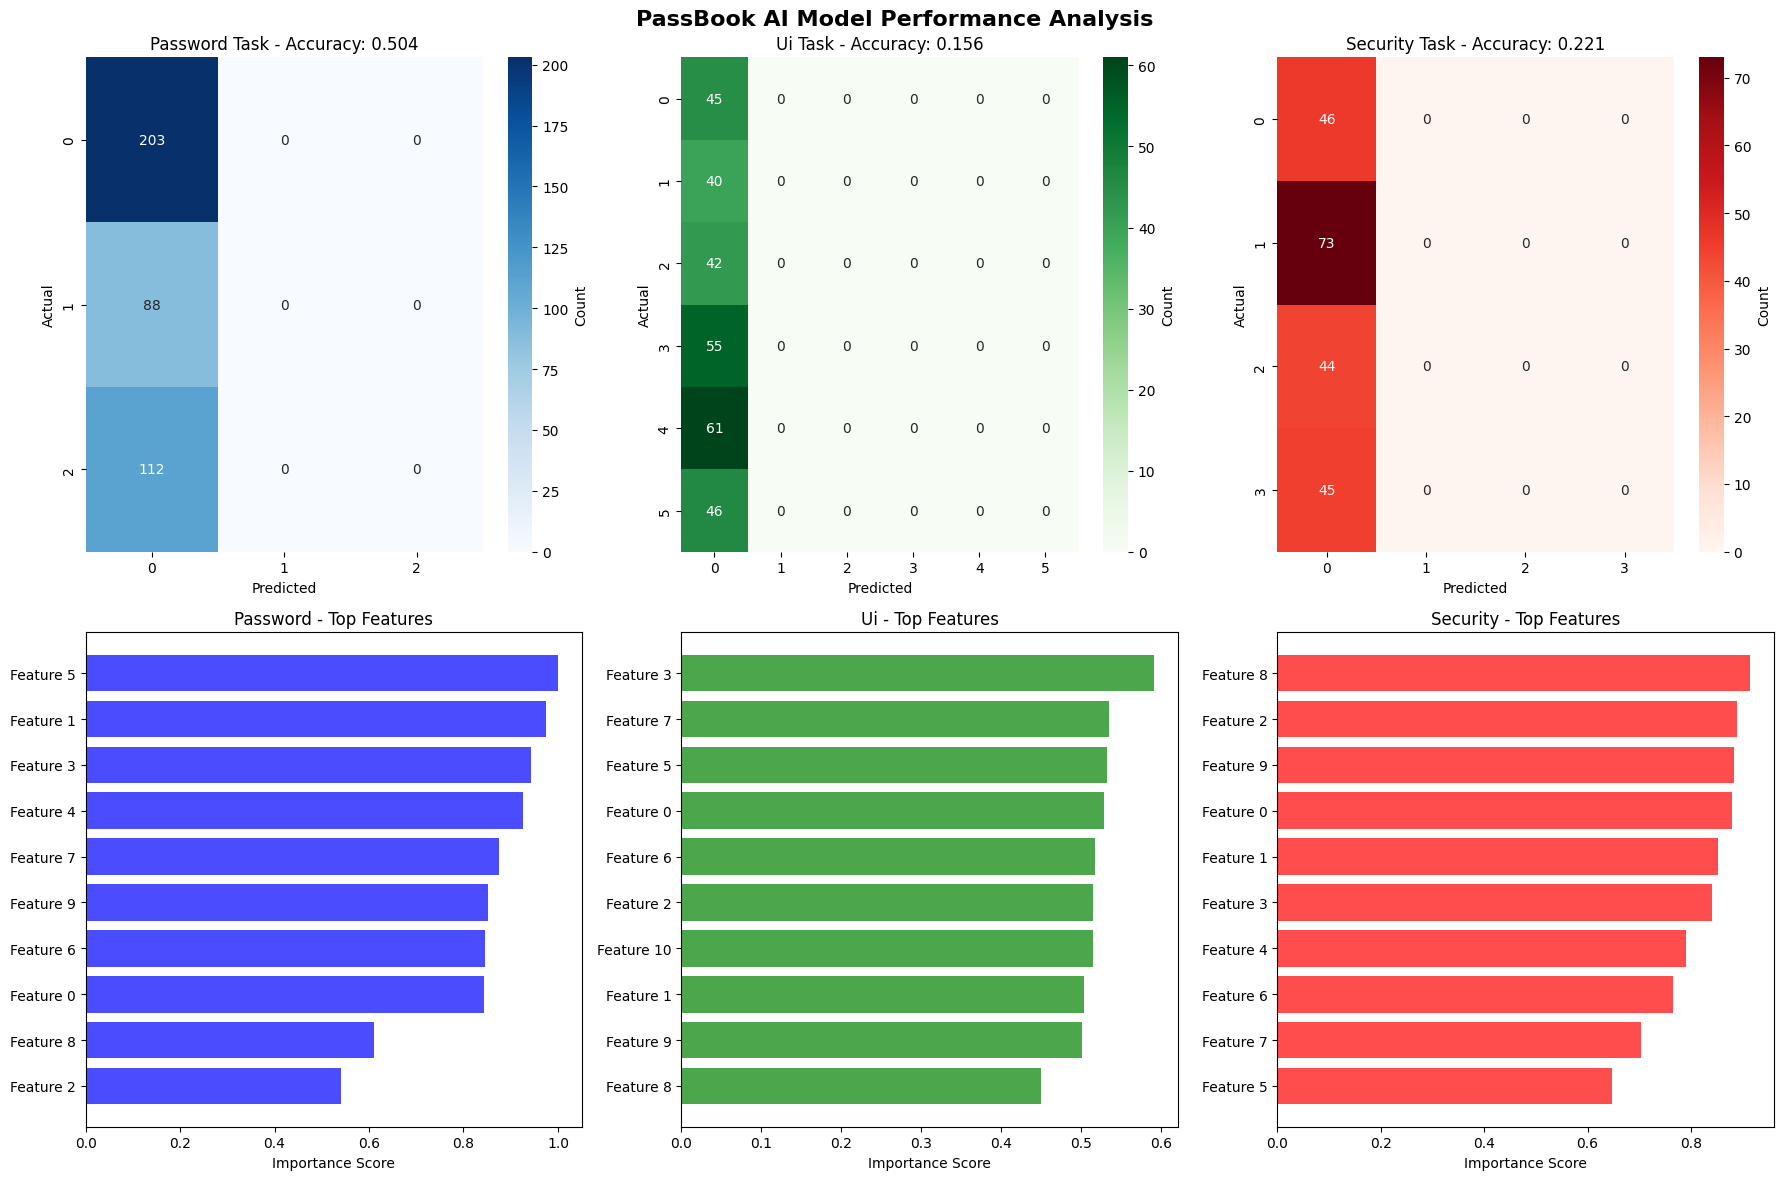

\n📈 Overall Model Statistics:
Model Parameters: 70,461
Training Data Size: 3,600 samples
Validation Data Size: 900 samples


In [16]:
# Evaluate model performance
def evaluate_model_performance():
    """Comprehensive model evaluation"""
    print("📊 Evaluating Model Performance...")

    # Create evaluation plots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('PassBook AI Model Performance Analysis', fontsize=16, fontweight='bold')

    # Task-specific evaluations
    tasks = ['password', 'ui', 'security']
    colors = ['blue', 'green', 'red'] # Keep colors for feature importance bars

    # Corrected colormap names for heatmap
    heatmaps_cmaps = ['Blues', 'Greens', 'Reds']

    for i, (task, color) in enumerate(zip(tasks, colors)):
        # Get task-specific data
        X_task_val, y_task_val = prepare_task_data(X_val, y_val_dict, task)

        if len(X_task_val) > 0:
            # Predict for this task by calling the model directly
            task_pred = model(X_task_val, task_type=task, training=False) # Call model directly
            if isinstance(task_pred, dict):
                task_pred = task_pred[f'{task}_output']

            # Get predicted classes
            y_pred_classes = np.argmax(task_pred, axis=1)

            # Accuracy
            accuracy = accuracy_score(y_task_val, y_pred_classes)

            # Confusion Matrix
            cm = confusion_matrix(y_task_val, y_pred_classes)

            # Plot confusion matrix
            sns.heatmap(cm, annot=True, fmt='d', ax=axes[0, i],
                       cmap=heatmaps_cmaps[i], cbar_kws={'label': 'Count'}) # Use corrected colormap
            axes[0, i].set_title(f'{task.title()} Task - Accuracy: {accuracy:.3f}')
            axes[0, i].set_xlabel('Predicted')
            axes[0, i].set_ylabel('Actual')

            # Feature importance (using attention weights if available)
            # Note: Directly extracting attention weights from the multi-head attention layer
            # can be complex. A simpler approximation for feature importance here is to
            # look at the mean absolute values of features for each task.
            # A more rigorous approach might involve gradient-based methods or permutation importance.
            feature_importance = np.mean(np.abs(X_task_val), axis=0)
            top_features = np.argsort(feature_importance)[-10:]

            axes[1, i].barh(range(len(top_features)), feature_importance[top_features],
                           color=color, alpha=0.7)
            axes[1, i].set_title(f'{task.title()} - Top Features')
            axes[1, i].set_xlabel('Importance Score')
            axes[1, i].set_yticks(range(len(top_features)))
            axes[1, i].set_yticklabels([f'Feature {f}' for f in top_features])

            print(f"✅ {task.title()} Task Accuracy: {accuracy:.3f}")

    plt.tight_layout()
    plt.show()

    # Overall model metrics
    print("\\n📈 Overall Model Statistics:")
    print(f"Model Parameters: {model.count_params():,}")
    print(f"Training Data Size: {len(X_train):,} samples")
    print(f"Validation Data Size: {len(X_val):,} samples")

    return fig

# Run evaluation
evaluation_plot = evaluate_model_performance()

In [17]:
def convert_to_tflite_optimized(model, model_name='passbook_ai_model'):
    """Convert model to optimized TensorFlow Lite format"""
    print("🔄 Converting to TensorFlow Lite...")

    # Create converter
    converter = tf.lite.TFLiteConverter.from_keras_model(model)

    # Optimization settings for mobile deployment
    converter.optimizations = [tf.lite.Optimize.DEFAULT]

    # Use float16 quantization for smaller model size
    converter.target_spec.supported_types = [tf.float16]

    # Representative dataset for better quantization
    def representative_dataset():
        for i in range(100):
            # Use a subset of validation data
            sample = X_val[i:i+1].astype(np.float32)
            yield [sample]

    converter.representative_dataset = representative_dataset

    # Enable dynamic range quantization
    converter.experimental_new_converter = True

    # Convert the model
    try:
        tflite_model = converter.convert()

        # Save the model
        model_path = f'{model_name}.tflite'
        with open(model_path, 'wb') as f:
            f.write(tflite_model)

        # Model size analysis
        model_size_mb = len(tflite_model) / (1024 * 1024)
        print(f"✅ TensorFlow Lite Model Created: {model_path}")
        print(f"📏 Model Size: {model_size_mb:.2f} MB")

        return tflite_model, model_path

    except Exception as e:
        print(f"❌ Conversion Error: {e}")
        return None, None

# Convert model
tflite_model, tflite_path = convert_to_tflite_optimized(model)

# Test TensorFlow Lite model inference
def test_tflite_inference(model_path, test_input):
    """Test TensorFlow Lite model inference speed and accuracy"""
    if not model_path:
        print("❌ No model to test")
        return

    print("🧪 Testing TensorFlow Lite Inference...")

    # Load TFLite model
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    # Get input/output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    print(f"Input Shape: {input_details[0]['shape']}")
    print(f"Output Count: {len(output_details)}")

    # Run inference benchmark
    import time
    inference_times = []

    for i in range(100):
        start_time = time.time()

        # Set input
        interpreter.set_tensor(input_details[0]['index'], test_input)

        # Run inference
        interpreter.invoke()

        # Get outputs
        outputs = {}
        for j, detail in enumerate(output_details):
            output_data = interpreter.get_tensor(detail['index'])
            outputs[f'output_{j}'] = output_data

        end_time = time.time()
        inference_times.append((end_time - start_time) * 1000)  # Convert to ms

    avg_inference_time = np.mean(inference_times)
    print(f"⚡ Average Inference Time: {avg_inference_time:.2f} ms")
    print(f"🎯 Target: < 100ms (✅ {'PASSED' if avg_inference_time < 100 else 'NEEDS OPTIMIZATION'})")

    return outputs, avg_inference_time

# Test inference with sample data
if tflite_path:
    sample_input = X_val[:1].astype(np.float32)
    test_outputs, inference_time = test_tflite_inference(tflite_path, sample_input)

print("🚀 TensorFlow Lite Conversion Complete!")

🔄 Converting to TensorFlow Lite...
Saved artifact at '/tmp/tmpc8pa74v8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Output Type:
  Dict[['password_output', TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)], ['ui_output', TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)], ['security_output', TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)]]
Captures:
  137207660677648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137207660677840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137207566108432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137207566109392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137207566109200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137207566108624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137207566109008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137207566108816: TensorSpec(s